<a href="https://colab.research.google.com/github/TomasWeinstabl/DataScience3/blob/main/NLP_Completo_Tomas_Weinstabl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! python -m spacy download es_core_news_md
! pip install -U symspellpy


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.3/42.3 MB 18.9 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.6/2.6 MB 25.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 144.1/144.1 kB 9.6 MB/s eta 0:00:00


In [ ]:
import nltk # importar natural language toolkit
nltk.download('punkt')
nltk.download('stopwords') # modulo para descargar stopwords en diferentes idiomas
nltk.download('wordnet')
from nltk.corpus import stopwords
import pandas as pd
import numpy  as np
import re
import string
import plotly
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import time
import spacy
import es_core_news_md
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.probability import FreqDist
from wordcloud import WordCloud
import pickle
from symspellpy import SymSpell
import pkg_resources
from symspellpy import SymSpell, Verbosity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-3-f80a7cb5fd39>:23: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [ ]:
import es_core_news_md
nlp = es_core_news_md.load()

In [ ]:
!wget https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Video_Games.jsonl.gz

--2025-03-30 11:15:00--  https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Video_Games.jsonl.gz
Resolving mcauleylab.ucsd.edu (mcauleylab.ucsd.edu)... 169.228.63.88
Connecting to mcauleylab.ucsd.edu (mcauleylab.ucsd.edu)|169.228.63.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 814206092 (776M) [application/gzip]
Saving to: ‚ÄòVideo_Games.jsonl.gz.1‚Äô

Video_Games.jsonl.g 100%[===================>] 776.49M  2.31MB/s    in 39s     

2025-03-30 11:15:39 (20.0 MB/s) - ‚ÄòVideo_Games.jsonl.gz.1‚Äô saved [814206092/814206092]



In [ ]:
# Leer el archivo en partes
amazon_reviews_iter = pd.read_json(
    '/content/Video_Games.jsonl.gz',
    lines=True,
    compression='gzip',
    chunksize=10000
)
# Procesar un solo chunk como ejemplo
for chunk in amazon_reviews_iter:
    data = chunk
    print(data.head(10))  # Muestra las primeras filas del chunk
    break  # Det√©n despu√©s del primer chunk si solo quieres una parte
# Seleccionando solo los primeros 10,000 registros para calculo mas rapido
#amazon_reviews = amazon_reviews[:10000]

   rating                                              title  \
0       4                     It‚Äôs pretty sexual. Not my fav   
1       5                                   Good. A bit slow   
2       5  ... an order for my kids & they have really en...   
3       5                        Great alt to pro controller   
4       5                                      solid product   
5       3  love all the amazing colors but the black is r...   
6       5                                     Will use again   
7       5  if its prime day and you're contemplating, jus...   
8       5                     Price bumps it up from 4 stars   
9       1                            It's an Auto-renew scam   

                                                text  \
0  I‚Äôm playing on ps5 and it‚Äôs interesting.  It‚Äôs...   
1  Nostalgic fun.  A bit slow.  I hope they don‚Äôt...   
2  This was an order for my kids & they have real...   
3  These work great, They use batteries which is ...   
4  I 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rating             10000 non-null  int64         
 1   title              10000 non-null  object        
 2   text               10000 non-null  object        
 3   images             10000 non-null  object        
 4   asin               10000 non-null  object        
 5   parent_asin        10000 non-null  object        
 6   user_id            10000 non-null  object        
 7   timestamp          10000 non-null  datetime64[ns]
 8   helpful_vote       10000 non-null  int64         
 9   verified_purchase  10000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 713.0+ KB


In [ ]:
# Diccionario con los nombres antiguos y los nuevos
names = {
    'asin': 'ProductId',
    'rating': 'Score',
    'helpful_vote': 'HelpfulnessNumerator',
    'timestamp': 'Time',
    'text': 'Text',
    'reviewerName': 'UserId',
    'title': 'Summary'
}

# Renombrar las columnas del DataFrame
data.rename(columns=names, inplace=True)

In [ ]:
data

Score                                            Summary  \
0         4                     It‚Äôs pretty sexual. Not my fav   
1         5                                   Good. A bit slow   
2         5  ... an order for my kids & they have really en...   
3         5                        Great alt to pro controller   
4         5                                      solid product   
...     ...                                                ...   
9995      3                                                Fun   
9996      5                         Works, seller was amazing!   
9997      5                         Don‚Äôt even like Star Wars.   
9998      2                                               Boo!   
9999      5  Yea yea yea fifth time I‚Äôve bought it‚Ä¶still wo...   

                                                   Text images   ProductId  \
0     I‚Äôm playing on ps5 and it‚Äôs interesting.  It‚Äôs...     []  B07DJWBYKP   
1     Nostalgic fun.  A bit slow.  I hope they don‚Äôt...     []  B00ZS80PC2   
2     This was an order for my kids & they have real...     []  B01FEHJYUU   
3     These work great, They use batteries which is ...     []  B07GXJHRVK   
4     I would recommend to anyone looking to add jus...     []  B00HUWA45W   
...                                                 ...    ...         ...   
9995  Works well, and is very fun to play! I have no...     []  B00ZQB7LZU   
9996  Ordered to replace the cord on PlayStation 4. ...     []  B00HUXPZPK   
9997   Not even a Star Wars fan‚Ä¶still really good game.     []  B07QQGJHD3   
9998                                            Booooo!     []  B0773RCY75   
9999  Sure still the same 60$ for a twelve year old ...     []  B075NFTX36   

     parent_asin                       user_id                    Time  \
0     B07DK1H3H5  AGCI7FAH4GL5FI65HYLKWTMFZ2CQ 2020-12-17 06:33:24.795   
1     B07SRWRH5D  AGCI7FAH4GL5FI65HYLKWTMFZ2CQ 2020-04-16 15:31:54.941   
2     B07MFMFW34  AGXVBIUFLFGMVLATYXHJYL4A5Q7Q 2017-03-30 12:37:11.000   
3     B0BCHWZX95  AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q 2019-12-29 16:40:34.017   
4     B00HUWA45W  AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q 2015-03-29 01:18:52.000   
...          ...                           ...                     ...   
9995  B00VG3PUFA  AEMYQLW2XHEIIGEHOC37XLYGFO4Q 2018-09-13 13:00:27.630   
9996  B0BDWVBWC9  AH65TAHPBWFT2FXGOVL7EIJTRULQ 2022-02-25 20:27:23.135   
9997  B07QQTJMRF  AESRJGBQLMK4HZYP53GXIUQ47GYQ 2021-08-22 02:13:50.441   
9998  B07NVTR5FD  AESRJGBQLMK4HZYP53GXIUQ47GYQ 2021-08-22 02:13:03.833   
9999  B078HMHPR7  AESRJGBQLMK4HZYP53GXIUQ47GYQ 2021-08-22 02:12:40.123   

      HelpfulnessNumerator  verified_purchase  
0                        0               True  
1                        1              False  
2                        0               True  
3                        0               True  
4                        0               True  
...                    ...                ...  
9995                     0               True  
9996                     0               True  
9997                     1               True  
9998                     0               True  
9999                    15               True  

[10000 rows x 10 columns]

In [ ]:
amazon_reviews = data

In [ ]:
amazon_reviews.Score.value_counts()

Score
5    6501
4    1573
3     742
1     740
2     444
Name: count, dtype: int64

In [ ]:
percent_val = 100 * amazon_reviews.Score.value_counts()/amazon_reviews.shape[0]
percent_val

Score
5    65.01
4    15.73
3     7.42
1     7.40
2     4.44
Name: count, dtype: float64

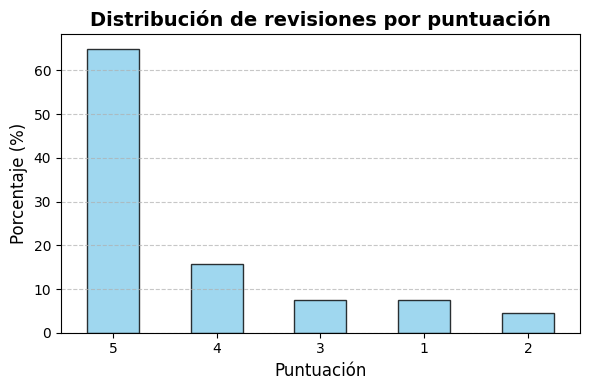

In [ ]:
# Crear el gr√°fico de barras
plt.figure(figsize=(6, 4))  # Ajusta el tama√±o del gr√°fico
percent_val.plot.bar(color='skyblue', edgecolor='black', alpha=0.8)

# A√±adir t√≠tulo y etiquetas con tama√±os optimizados
plt.title('Distribuci√≥n de revisiones por puntuaci√≥n', fontsize=14, fontweight='bold')
plt.xlabel('Puntuaci√≥n', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)

# Personalizar las etiquetas del eje x
plt.xticks(rotation=0, fontsize=10)

# A√±adir cuadr√≠cula para mejorar la legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar m√°rgenes
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()

In [ ]:
amazon_reviews['Text']

0       I‚Äôm playing on ps5 and it‚Äôs interesting.  It‚Äôs...
1       Nostalgic fun.  A bit slow.  I hope they don‚Äôt...
2       This was an order for my kids & they have real...
3       These work great, They use batteries which is ...
4       I would recommend to anyone looking to add jus...
                              ...                        
9995    Works well, and is very fun to play! I have no...
9996    Ordered to replace the cord on PlayStation 4. ...
9997     Not even a Star Wars fan‚Ä¶still really good game.
9998                                              Booooo!
9999    Sure still the same 60$ for a twelve year old ...
Name: Text, Length: 10000, dtype: object

In [ ]:
amazon_reviews.head(10)

Score                                            Summary  \
0      4                     It‚Äôs pretty sexual. Not my fav   
1      5                                   Good. A bit slow   
2      5  ... an order for my kids & they have really en...   
3      5                        Great alt to pro controller   
4      5                                      solid product   
5      3  love all the amazing colors but the black is r...   
6      5                                     Will use again   
7      5  if its prime day and you're contemplating, jus...   
8      5                     Price bumps it up from 4 stars   
9      1                            It's an Auto-renew scam   

                                                Text  \
0  I‚Äôm playing on ps5 and it‚Äôs interesting.  It‚Äôs...   
1  Nostalgic fun.  A bit slow.  I hope they don‚Äôt...   
2  This was an order for my kids & they have real...   
3  These work great, They use batteries which is ...   
4  I would recommend to anyone looking to add jus...   
5  love all the amazing colors but the black is r...   
6                                  Instant delivery!   
7  you should probably get these. you'll journal ...   
8  *it fits TWO wired Retro-bit 6 button controll...   
9  Sony and Amazon are collaborating in an Auto-r...   

                                              images   ProductId parent_asin  \
0                                                 []  B07DJWBYKP  B07DK1H3H5   
1                                                 []  B00ZS80PC2  B07SRWRH5D   
2                                                 []  B01FEHJYUU  B07MFMFW34   
3                                                 []  B07GXJHRVK  B0BCHWZX95   
4                                                 []  B00HUWA45W  B00HUWA45W   
5                                                 []  B016Y2BVKA  B073SC6V1D   
6                                                 []  B004RMK57U  B004RMK57U   
7  [{'small_image_url': 'https://images-na.ssl-im...  B07N85FY1G  B0BYVN9ZK2   
8                                                 []  B08L6782X9  B08L6782X9   
9                                                 []  B017V6YVDC  B017V6YVDC   

                        user_id                    Time  HelpfulnessNumerator  \
0  AGCI7FAH4GL5FI65HYLKWTMFZ2CQ 2020-12-17 06:33:24.795                     0   
1  AGCI7FAH4GL5FI65HYLKWTMFZ2CQ 2020-04-16 15:31:54.941                     1   
2  AGXVBIUFLFGMVLATYXHJYL4A5Q7Q 2017-03-30 12:37:11.000                     0   
3  AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q 2019-12-29 16:40:34.017                     0   
4  AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q 2015-03-29 01:18:52.000                     0   
5  AHXSBZT52TCPZUBVCBRICTHWUCBA 2018-02-08 21:15:39.574                     0   
6  AHZIJGKEWRTAEOZ673G5B3SNXEGQ 2020-10-17 12:28:29.361                     0   
7  AFO6QN6ICKWUFQV3UEWK5EECIQTQ 2020-10-14 23:35:12.453                     0   
8  AG6BAEKWLCWH2TW3KKLVK773YF6A 2021-05-19 18:24:30.253                     0   
9  AG6BAEKWLCWH2TW3KKLVK773YF6A 2020-12-12 00:54:34.794                     2   

   verified_purchase  
0               True  
1              False  
2               True  
3               True  
4               True  
5               True  
6               True  
7              False  
8               True  
9               True

Tama√±o del texto concatenado: 4020488 caracteres


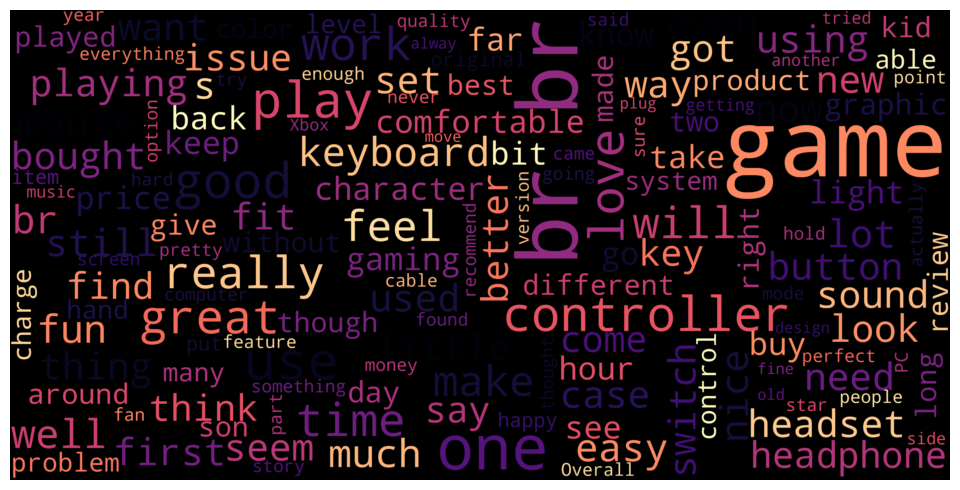

In [ ]:
# Concatenar el texto de todas las revisiones
word_cloud_text = ' '.join(amazon_reviews.Text.dropna())  # Manejo de valores nulos
print(f"Tama√±o del texto concatenado: {len(word_cloud_text)} caracteres")

# Configuraci√≥n del WordCloud
wordcloud = WordCloud(
    max_font_size=80,         # Tama√±o m√°ximo de la fuente ajustado
    max_words=150,            # N√∫mero m√°ximo de palabras
    background_color="black", # Fondo blanco
    scale=5,                  # Escala ajustada para mejorar el rendimiento
    width=800,                # Ancho de la imagen
    height=400,               # Alto de la imagen
    colormap='magma'        # Colormap para colores m√°s atractivos
).generate(word_cloud_text)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))  # Tama√±o del gr√°fico optimizado
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Ocultar ejes
plt.tight_layout()  # Ajustar m√°rgenes
plt.show()

In [ ]:
amazon_reviews['Sentiment_rating'] = np.where(amazon_reviews.Score > 3, 1, 0)
amazon_reviews['Sentiment_rating'].value_counts()

Sentiment_rating
1    8074
0    1926
Name: count, dtype: int64

In [ ]:
# removiendo neutrales
amazon_reviews = amazon_reviews[amazon_reviews.Score != 3]

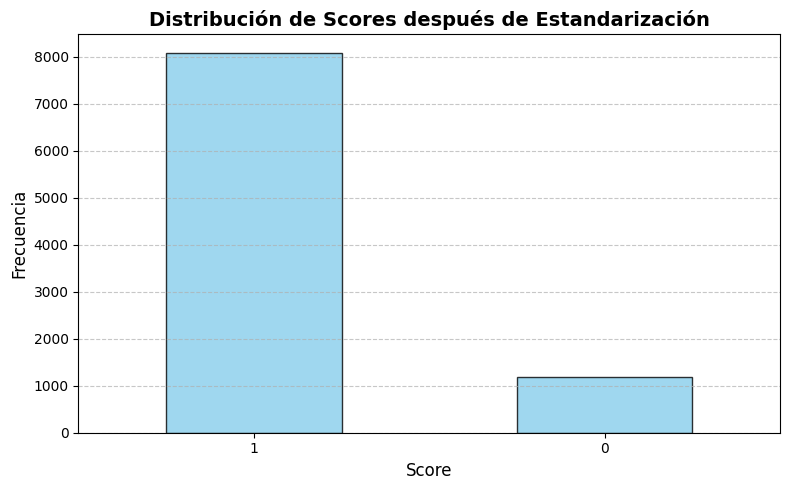

In [ ]:
# Configuraci√≥n del tama√±o de la figura
plt.figure(figsize=(8, 5))  # Ajusta el tama√±o de la figura para mejor presentaci√≥n

# Crear el gr√°fico de barras
amazon_reviews.Sentiment_rating.value_counts().plot.bar(
    color='skyblue',          # Color de las barras
    edgecolor='black',        # Color de los bordes de las barras
    alpha=0.8                 # Transparencia para un efecto m√°s suave
)

# A√±adir t√≠tulo y etiquetas
plt.title('Distribuci√≥n de Scores despu√©s de Estandarizaci√≥n', fontsize=14, fontweight='bold')
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Personalizaci√≥n de las etiquetas del eje x
plt.xticks(rotation=0, fontsize=10)  # Asegurar que las etiquetas del eje X sean legibles

# A√±adir cuadr√≠cula en el eje Y para mejorar la legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar m√°rgenes y presentaci√≥n
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()

In [ ]:
amazon_reviews['reviews_text_new'] = amazon_reviews.Text.apply(lambda x: x.lower())

<ipython-input-128-5a39403d7401>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_reviews['reviews_text_new'] = amazon_reviews.Text.apply(lambda x: x.lower())


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

try:
    nltk.download('punkt')
    nltk.download('punkt_tab')
    nltk.download('averaged_perceptron_tagger')  # Para etiquetado POS si es necesario
except Exception as e:
    print(f"Error al descargar los recursos de nltk: {e}")

# Tokenizar los textos de amazon_reviews
try:
    token_lists = [word_tokenize(each) for each in amazon_reviews.Text]
    tokens = [item for sublist in token_lists for item in sublist]
    print("Numero de tokens unicos antes: ", len(set(tokens)))

    token_lists_lower = [word_tokenize(each) for each in amazon_reviews.reviews_text_new]
    tokens_lower = [item for sublist in token_lists_lower for item in sublist]
    print("Numero de tokens unicos nuevos: ", len(set(tokens_lower)))
except LookupError as e:
    print(f"Error de b√∫squeda de recursos NLTK: {e}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Numero de tokens unicos antes:  28953
Numero de tokens unicos nuevos:  24301


In [ ]:
# Seleccionando los caracteres no alfa numericos que no son espacios
special_chars = amazon_reviews.reviews_text_new.apply(lambda x: [each for each in list(x) if not each.isalnum() and each != ' '])

# obtener una lista de listas
flat_list = [item for sublist in special_chars for item in sublist]

# caracteres especiales unicos
print(set(flat_list))

{'Ô∏è', "'", '%', 'üåü', '\u200d', 'üòÇ', '*', '{', ';', 'üòÄ', 'üé§', '#', '[', 'üôÇ', '¬∞', 'üòç', 'üéÇ', '‚ö°', 'üêª', 'üêæ', 'üò§', 'üí•', 'üèª', '(', '-', 'ü•∞', '\\', 'üé•', '\xa0', 'üíò', 'üíï', '‚ù§', '‚Äò', '‚ôÄ', 'üòë', '‚ôÇ', '=', '‚Äô', 'üòä', 'üéß', 'üçÄ', 'ü§£', '+', 'üòî', '`', 'üíØ', '.', 'üòª', 'üèæ', '‚Äú', 'üíé', 'üòí', '‚Ä¶', 'üòÅ', 'ü§≠', 'ü§∑', 'üòÜ', '‚òπ', 'üôã', '‚òÄ', 'üéÅ', 'üòü', 'ü•≥', 'ü§è', 'ÔøΩ', '‚úÖ', '‚Äì', 'üî¥', ':', ',', '‚ù£', '&', '_', 'üôÑ', '‚≠ê', '"', 'üòÉ', 'ü§î', 'ü§¶', 'üëç', '>', '!', '@', 'üòû', 'ü§Ø', ')', 'üèº', 'üì¶', 'üíµ', '<', 'üîã', '¬©', '|', '/', '^', 'üëë', '‚Äù', '?', 'üöö', 'üòö', '$', '‚Ä¢', 'üíú', 'üòâ', 'üôå', ']', '}', '‚úî', 'üòé', 'ü§©', '\u200b', 'üòÖ', '~', '‚Äî', '‚ô•'}


In [ ]:
import re
review_backup = amazon_reviews.reviews_text_new.copy()
amazon_reviews.reviews_text_new = amazon_reviews.reviews_text_new.apply(
    lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)
)

<ipython-input-131-fd4c087953c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_reviews.reviews_text_new = amazon_reviews.reviews_text_new.apply(


Probamos que efectivamente ambos arrays son iguales pero el nuevo no tiene caracteres especiales

amazon_reviews.text ser√≠a el texto inicial

review_backup ser√≠a el texto luego de la transformaci√≥n a min√∫sculas

amazon_reviews.reviews_text_new ser√≠a review_backup pero con la transformaci√≥n de quitar caracteres especiales

In [ ]:
review_backup.head(10)

0     i‚Äôm playing on ps5 and it‚Äôs interesting.  it‚Äôs...
1     nostalgic fun.  a bit slow.  i hope they don‚Äôt...
2     this was an order for my kids & they have real...
3     these work great, they use batteries which is ...
4     i would recommend to anyone looking to add jus...
6                                     instant delivery!
7     you should probably get these. you'll journal ...
8     *it fits two wired retro-bit 6 button controll...
9     sony and amazon are collaborating in an auto-r...
10    good, a tad bit too bulky, but good. they stay...
Name: reviews_text_new, dtype: object

In [ ]:
amazon_reviews[['Text','reviews_text_new']].head(10)

Text  \
0   I‚Äôm playing on ps5 and it‚Äôs interesting.  It‚Äôs...   
1   Nostalgic fun.  A bit slow.  I hope they don‚Äôt...   
2   This was an order for my kids & they have real...   
3   These work great, They use batteries which is ...   
4   I would recommend to anyone looking to add jus...   
6                                   Instant delivery!   
7   you should probably get these. you'll journal ...   
8   *it fits TWO wired Retro-bit 6 button controll...   
9   Sony and Amazon are collaborating in an Auto-r...   
10  good, a tad bit too bulky, but good. they stay...   

                                     reviews_text_new  
0   i m playing on ps5 and it s interesting   it s...  
1   nostalgic fun   a bit slow   i hope they don t...  
2   this was an order for my kids   they have real...  
3   these work great  they use batteries which is ...  
4   i would recommend to anyone looking to add jus...  
6                                   instant delivery   
7   you should probably get these  you ll journal ...  
8    it fits two wired retro bit 6 button controll...  
9   sony and amazon are collaborating in an auto r...  
10  good  a tad bit too bulky  but good  they stay...

In [ ]:
#Comparamos el antes vs el despu√©s de la cantidad de tokens √∫nicos tras aplicar las transformaciones (tanto la de minusculas como la de caracteres especiales)

token_lists = [word_tokenize(each) for each in amazon_reviews.Text]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de token unicos antes: ", len(set(tokens)))

token_lists = [word_tokenize(each) for each in amazon_reviews.reviews_text_new]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de tokens unicos despues: ", len(set(tokens)))

Numero de token unicos antes:  28953
Numero de tokens unicos despues:  19499


In [ ]:
#Accedemos al diccionario de stopwords de nltk en idioma ingl√©s y metemos todas las stopwords en una lista llamada noise_words

nltk.download('stopwords')

noise_words = []
stopwords_corpus = nltk.corpus.stopwords
eng_stop_words = stopwords_corpus.words('english')
noise_words.extend(eng_stop_words)
print(len(noise_words))
noise_words

198


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
#Obtenemos el top 1% de palabras en cantidad de apariciones

from collections import Counter

one_percentile = int(len(set(tokens)) * 0.01)
top_1_percentile = Counter(tokens).most_common(one_percentile)
top_1_percentile[:10]

[('the', 33798),
 ('i', 18856),
 ('and', 18725),
 ('to', 16812),
 ('a', 16557),
 ('it', 16495),
 ('br', 11957),
 ('is', 10949),
 ('of', 9813),
 ('this', 9721)]

In [ ]:
#Obtenemos el bottom 1% de palabras en cantidad de apariciones

bottom_1_percentile = Counter(tokens).most_common()[-one_percentile:]
bottom_1_percentile[:10]

[('replenishing', 1),
 ('unstuck', 1),
 ('openi', 1),
 ('ga', 1),
 ('pawn', 1),
 ('microscopic', 1),
 ('wack', 1),
 ('particles', 1),
 ('palmers', 1),
 ('loudest', 1)]

In [ ]:
#A√±adimos el top 1% y el bottom 1% a la lista de noisewords, junto a las stopwords

noise_words.extend([word for word,val in top_1_percentile])
noise_words.extend([word for word,val in bottom_1_percentile])

In [ ]:
#Importamos librer√≠as para stemming y lemmatization

from nltk.stem import PorterStemmer, WordNetLemmatizer, LancasterStemmer

nltk.download('wordnet')

from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#Muestro los campos que nos ser√°n √∫tiles para el analisis de sentimiento

amazon_reviews[['Text','Score','Sentiment_rating']].head(10)

Text  Score  Sentiment_rating
0   I‚Äôm playing on ps5 and it‚Äôs interesting.  It‚Äôs...      4                 1
1   Nostalgic fun.  A bit slow.  I hope they don‚Äôt...      5                 1
2   This was an order for my kids & they have real...      5                 1
3   These work great, They use batteries which is ...      5                 1
4   I would recommend to anyone looking to add jus...      5                 1
6                                   Instant delivery!      5                 1
7   you should probably get these. you'll journal ...      5                 1
8   *it fits TWO wired Retro-bit 6 button controll...      5                 1
9   Sony and Amazon are collaborating in an Auto-r...      1                 0
10  good, a tad bit too bulky, but good. they stay...      4                 1

In [ ]:
# Creacion de metodo para stemming

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

In [ ]:
# Creacion de un objeto tipo CountVectorizer

bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=noise_words,
    ngram_range=(1, 1)
)

In [ ]:
# Preparamos el test split asign√°ndole un 20% de los datos al set de testeo

from sklearn.model_selection import train_test_split

reviews_train, reviews_test = train_test_split(amazon_reviews, test_size=0.2, random_state=0)


In [ ]:
X_train_bow = bow_counts.fit_transform(reviews_train.reviews_text_new)
X_test_bow = bow_counts.transform(reviews_test.reviews_text_new)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'m", "'re", "'s", "'ve", 'might', 'must', "n't", 'sha', 'wo'] not in stop_words.
  warnings.warn(


In [ ]:
y_train_bow = reviews_train['Sentiment_rating']
y_test_bow = reviews_test['Sentiment_rating']

In [ ]:
# Obtenemos la cantidad de rese√±as positivas y negativos dentro del set de test

y_test_bow.value_counts() / y_test_bow.shape[0]

Sentiment_rating
1    0.87203
0    0.12797
Name: count, dtype: float64

In [ ]:
# Comenzamos con el modelo de regresi√≥n log√≠stica

# Descargamos librer√≠a correspondientes para regresi√≥n log√≠stica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Entrenar el modelo
lr_model_all = LogisticRegression(C=1, solver="liblinear")
lr_model_all.fit(X_train_bow, y_train_bow)

# Predecir el output
test_pred_lr_prob = lr_model_all.predict_proba(X_test_bow)
test_pred_lr_all = lr_model_all.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)

F1 score:  0.9411057692307693
Accuracy:  89.41684665226782


In [ ]:
# Averiguo las probabilidades de cada una de las predicciones

test_pred_lr_prob

array([[0.02626223, 0.97373777],
       [0.08376891, 0.91623109],
       [0.00134599, 0.99865401],
       ...,
       [0.04580419, 0.95419581],
       [0.02742596, 0.97257404],
       [0.00819207, 0.99180793]])

In [ ]:
# Me quedo s√≥lo con las probabilidades que indican valor =1

probabilities = [each[1] for each in test_pred_lr_prob]

In [ ]:
#Armo un dataframe para almacenar los campos relevantes del test: texto, score, sentiment, predicci√≥n de sentimiento, y probabilidad de la misma

predictions = pd.DataFrame()
predictions['Text'] = reviews_test['Text']
predictions['Actual_Score'] = reviews_test['Score']
predictions['Sentiment_rating'] = reviews_test['Sentiment_rating']
predictions['Predicted_sentiment'] = test_pred_lr_all
predictions['Predicted_probability'] = probabilities

predictions.head(30)

Text  Actual_Score  \
3415  Works perfectly for the Xbox One controller. I...             4   
5461               Love the game play it all the time !             4   
33    I still own my Wii which works perfectly and I...             5   
6260  Graphically, the game is good and the voice ac...             2   
4940                                               Gift             4   
648   Got this for my Switch as I didn't want to sav...             4   
8279  I have started EO II after I beat EO 1. I have...             5   
5347  The game looks to be okay but the case was des...             2   
4769  Great quality just wrong game, my son wanted t...             4   
2981  I bought this controller as a replacement for ...             1   
4902  Paper Mario the Thousand Year Door is definite...             5   
9261  One of my favorite mortal kombat games. You'll...             4   
3797   Bought for my husband, He has had no complaints.             5   
1161                             Short but a great game             5   
1652  These were perfect! The sound is good and the ...             5   
4038  Supposed to take around 4hrs to charge a batte...             4   
165   Let me say first off that I have just unboxed ...             2   
7985          Kid hasn't said anything bad. No problems             5   
5577                                    LOVE THIS MOVIE             5   
3968  Game too complicated to enjoy. Too many option...             2   
8320  The Ahsoka Tano figure arrived on time and as ...             5   
7695           Love Sonic. This game is old school fun.             5   
4800  My daughter enjoys playing with this case and ...             4   
7448  My favorite stylis I love how they fold down. ...             5   
8403  I just got this game and I absolutely love it!...             5   
4257  You are going to love this controller. It is a...             5   
6459  The brown switches in this keyboard aren't nam...             5   
2129  I lobe this game.  I'm a huge minecraft fan wi...             4   
8829  I think this is a good face cushion which work...             4   
828   OMG great family fun. My guys are all into vid...             4   

      Sentiment_rating  Predicted_sentiment  Predicted_probability  
3415                 1                    1               0.973738  
5461                 1                    1               0.916231  
33                   1                    1               0.998654  
6260                 0                    1               0.879818  
4940                 1                    1               0.956437  
648                  1                    1               0.974098  
8279                 1                    1               0.857562  
5347                 0                    1               0.596849  
4769                 1                    1               0.890165  
2981                 0                    0               0.043805  
4902                 1                    1               0.998871  
9261                 1                    1               0.936825  
3797                 1                    1               0.988541  
1161                 1                    1               0.915978  
1652                 1                    1               0.997654  
4038                 1                    0               0.002656  
165                  0                    0               0.037202  
7985                 1                    1               0.913994  
5577                 1                    1               0.909349  
3968                 0                    1               0.998135  
8320                 1                    1               0.996434  
7695                 1                    1               0.925323  
4800                 1                    1               0.957433  
7448                 1                    1               0.978569  
8403                 1                    1               0.95

In [ ]:
accuracy_score(predictions['Sentiment_rating'], predictions['Predicted_sentiment'])

0.8941684665226782

In [ ]:
predictions[
    predictions['Predicted_sentiment'] != predictions['Sentiment_rating']
].head(30)

Text  Actual_Score  \
6260  Graphically, the game is good and the voice ac...             2   
5347  The game looks to be okay but the case was des...             2   
4038  Supposed to take around 4hrs to charge a batte...             4   
3968  Game too complicated to enjoy. Too many option...             2   
8829  I think this is a good face cushion which work...             4   
7632  I won't repeat all that has been written, but ...             2   
1776  I've been using wireless keyboards and mouses ...             4   
3036  Works sometimes, not terribly powerful, need p...             2   
1864  High quality look and feel with this controlle...             2   
4450  Ooo I got this new mouse and keyboard for my r...             5   
7970  While it was easy to assemble, I‚Äôm upset at th...             2   
6835  I really wanted to like these. I have a high e...             2   
1193  worst Resident evil game... Platinumed the gam...             1   
9166  Stays only in orange when charging. Then the y...             1   
8134  It doesn't fit my mini nintendo and it said it...             1   
8324  First one had better characters, better story,...             2   
19    NOT RECCOMENDED, BROKE 2MONTYS AFTER I PURCHAS...             1   
6577  This price SUCKS, and there is no cheaper alte...             2   
8328  The thumb grips are useless. They slide and bu...             1   
1308  The airflow is blocked by the panel it attache...             2   
9617  Boring game you just walk and walk no gameplay...             1   
2397  This would be overall a nice cable. It is a st...             1   
3484  It worked well for a few months, but is starti...             2   
534   It didn‚Äôt work on my console. And I really nee...             1   
3095             Did not like this at all.  Felt flimsy             1   
4243  You never know when you might need new thumb g...             4   
4054  I can‚Äôt say anything to how they sound or anyt...             1   
5267  It's an alright mouse, but the buttons on the ...             2   
8620  Do not buy those. Your friends will be more an...             1   
3563  I was not so impressed with this version. I lo...             2   

      Sentiment_rating  Predicted_sentiment  Predicted_probability  
6260                 0                    1               0.879818  
5347                 0                    1               0.596849  
4038                 1                    0               0.002656  
3968                 0                    1               0.998135  
8829                 1                    0               0.044865  
7632                 0                    1               0.995060  
1776                 1                    0               0.468344  
3036                 0                    1               0.926615  
1864                 0                    1               0.989243  
4450                 1                    0               0.328777  
7970                 0                    1               0.976157  
6835                 0                    1               0.991380  
1193                 0                    1               0.544294  
9166                 0                    1               0.750551  
8134                 0                    1               0.935140  
8324                 0                    1               0.990699  
19                   0                    1               0.590035  
6577                 0                    1               0.929629  
8328                 0                    1               0.555586  
1308                 0                    1               0.872755  
9617                 0                    1               0.677081  
2397                 0                    1               0.997890  
3484                 0                    1               0.524104  
534                  0                    1               0.962138  
3095                 0                    1             

In [ ]:
# Suponiendo que 'predictions' es tu DataFrame con las predicciones
# (como se defini√≥ en tu c√≥digo anterior)

# Filtrar las predicciones incorrectas
incorrect_predictions = predictions[predictions['Predicted_sentiment'] != predictions['Sentiment_rating']]

# Calcular las m√©tricas para los falsos negativos (1 predicho como 0)
false_negatives = incorrect_predictions[incorrect_predictions['Sentiment_rating'] == 1]
total_false_negatives = len(false_negatives)
avg_prob_false_negatives = false_negatives['Predicted_probability'].mean()

# Calcular las m√©tricas para los falsos positivos (0 predicho como 1)
false_positives = incorrect_predictions[incorrect_predictions['Sentiment_rating'] == 0]
total_false_positives = len(false_positives)
avg_prob_false_positives = false_positives['Predicted_probability'].mean()

# Crear la tabla
data = {
    'Tipo de error': ['Falsos Negativos (1 predicho como 0)', 'Falsos Positivos (0 predicho como 1)'],
    'Total': [total_false_negatives, total_false_positives],
    'Probabilidad promedio': [avg_prob_false_negatives, avg_prob_false_positives]
}

error_table = pd.DataFrame(data)

# Mostrar la tabla
print(error_table)

                          Tipo de error  Total  Probabilidad promedio
0  Falsos Negativos (1 predicho como 0)     49               0.245017
1  Falsos Positivos (0 predicho como 1)    147               0.837241


Tras hacer el modelo de regresi√≥n log√≠stica podemos concluir que la accuracy es aceptable, siendo esta del 89%.

Tambi√©n podemos decir que, sobre las predicciones erradas, la probabilidad de los falsos negativos promedia 0.24 (es decir, 0.24 alejado de una predicci√≥n contundentemente falsa de 0), mientras que los falsos positivos promedian 0.83 (es decir s√≥lo 0.17 alejados de una predicci√≥n contundente positiva de 1).

Si bien har√≠a falta otro analisis para demostrarlo, parecer√≠a ser que el hecho de que hayan tantos valores positivos en la muestra de prueba y tan pocos negativos, hace que las predicciones tengan un sesgo a predicir positivamente.

